We will explore data from the kickstarter's official set of datas where we have an outcome measurement of categorical type in the training data. The goal of this exploration is to select or engineer features to predict whether a kickstart project will get succesfully funcded or not.


We will use pandas framework to handle our data sets which are in the CSV format.  

In [1]:
import pandas as pd

Save the training and testing data sets as dataframes.

In [2]:
train =  pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

To get the number of observations:

In [3]:
print(len(train.index))

108129


We can check the data types of the columns in the training data

In [4]:
print(train.dtypes)

project_id                object
name                      object
desc                      object
goal                     float64
keywords                  object
disable_communication       bool
country                   object
currency                  object
deadline                   int64
state_changed_at           int64
created_at                 int64
launched_at                int64
backers_count              int64
final_status               int64
dtype: object


We will do univariate analysis for the variables. We will first check if there any missing values in any of the variables.

In [5]:
def num_missing(x):
    return sum(x.isnull())
print(train.apply(num_missing,axis=0))

project_id               0
name                     3
desc                     9
goal                     0
keywords                 0
disable_communication    0
country                  0
currency                 0
deadline                 0
state_changed_at         0
created_at               0
launched_at              0
backers_count            0
final_status             0
dtype: int64


There are no variables except for name that have missing or null values. 

We will First import the matplotlib library for visualization and start our univariate analysis from the goal variable.

In [6]:
import matplotlib.pyplot as plt

The goal variable's description has been given below. We will plot the distribution of the goal variable using histogram.

In [7]:
pd.set_option('float_format', '{:f}'.format)
print(train['goal'].describe())

count      108129.000000
mean        36726.228833
std        971902.705156
min             0.010000
25%          2000.000000
50%          5000.000000
75%         13000.000000
max     100000000.000000
Name: goal, dtype: float64


As you can see the count from describe function is equal to the number of observations. Therefore there are no missing values for the goal variable.

Now we will plot the goal variable using histogram and boxplot.

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0500e+02, 4.1100e+02,
        7.1000e+02, 4.9820e+03, 2.5570e+04, 3.9701e+04, 2.7449e+04,
        7.6760e+03, 1.2060e+03, 2.4800e+02, 5.1000e+01, 1.9000e+01]),
 array([-4.60517019, -3.07011346, -1.53505673,  0.        ,  1.53505673,
         3.07011346,  4.60517019,  6.14022691,  7.67528364,  9.21034037,
        10.7453971 , 12.28045383, 13.81551056, 15.35056729, 16.88562402,
        18.42068074]),
 <a list of 15 Patch objects>)

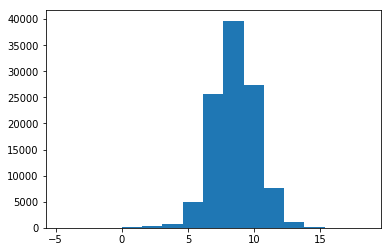

In [20]:
plt.hist(train['goal'], bins = 15)

The distribution of the goal variable does not tell a lot about the data. It seems to be extremely skewed. Let's confirm this using box plot.

In [14]:
train.boxplot(column = "goal")

The values of the goal variable are mostly collected into one bin in the histogram and are strongly skewed that many details are obscured. We can apply log transform to make it more gaussian like using the numpy library

In [16]:
import numpy as np

In [17]:
train['goal'] = np.log(train['goal'])

Now we will plot the histogram and the box plot again.

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0500e+02, 4.1100e+02,
        7.1000e+02, 4.9820e+03, 2.5570e+04, 3.9701e+04, 2.7449e+04,
        7.6760e+03, 1.2060e+03, 2.4800e+02, 5.1000e+01, 1.9000e+01]),
 array([-4.60517019, -3.07011346, -1.53505673,  0.        ,  1.53505673,
         3.07011346,  4.60517019,  6.14022691,  7.67528364,  9.21034037,
        10.7453971 , 12.28045383, 13.81551056, 15.35056729, 16.88562402,
        18.42068074]),
 <a list of 15 Patch objects>)

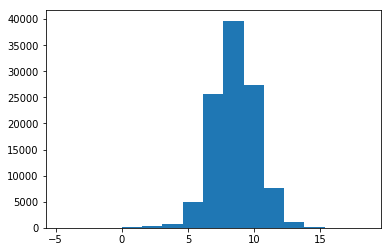

In [19]:
plt.hist(train['goal'], bins = 15)

In [21]:
train.boxplot(column = "goal")

The distribution looks better and more detailed. Lets compare our goal variable with the final_status which the independent variable that tells whether a project gets succesfull or not.

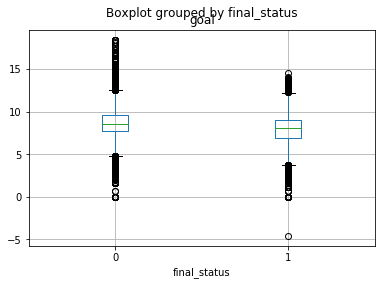

In [24]:
train.boxplot(by = "final_status", column = "goal")